<a href="https://colab.research.google.com/github/sethu-7/Dog-Breed-Identification/blob/main/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

##Import tensorflow##


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TEnsorflow version :",tf.__version__)
print("TEnsorflow_hub version :",hub.__version__)

TEnsorflow version : 2.15.0
TEnsorflow_hub version : 0.15.0


In [ ]:
labels_csv=pd.read_csv("/content/drive/MyDrive/dog-breed-identification/labels.csv")
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: >

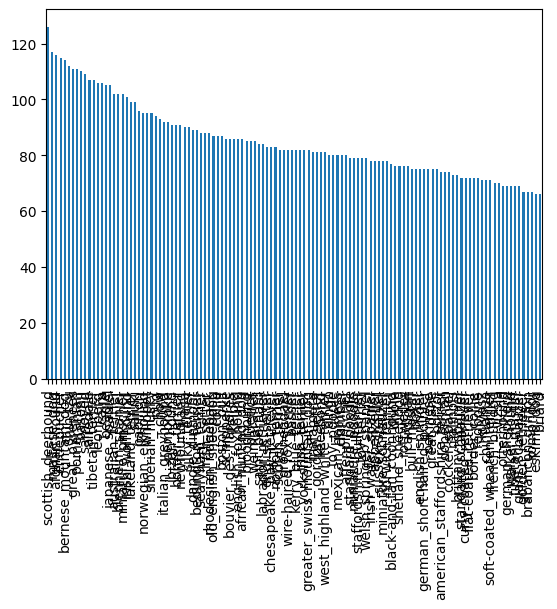

In [ ]:
labels_csv['breed'].value_counts().plot.bar()

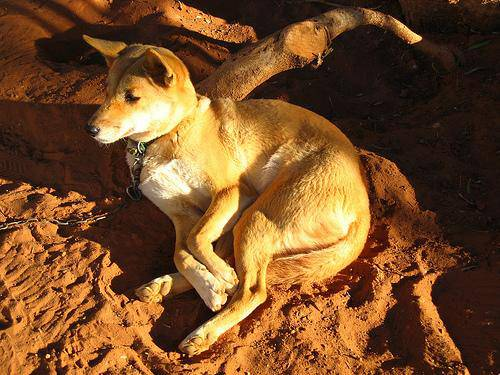

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [ ]:
# Create pathnames from image id
filenames = ["/content/drive/MyDrive/dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]

filenames[:10]

['/content/drive/MyDrive/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check wether number of filenames matches number of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/dog-breed-identification/train")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory")

Filenames do not match actual amount of files, check the target directory


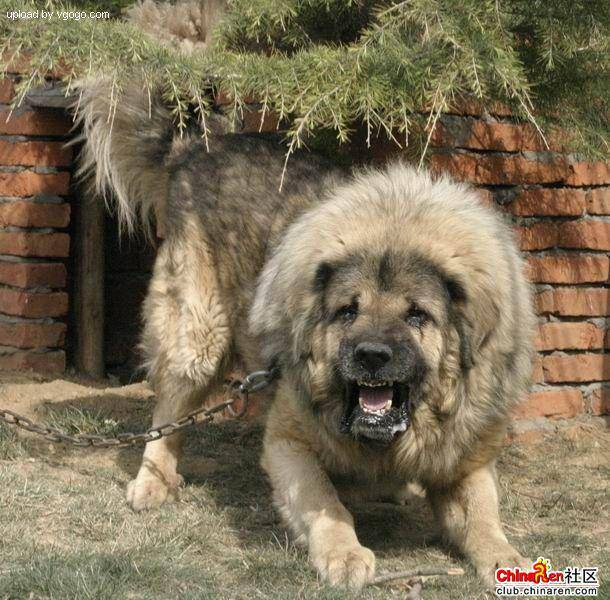

In [ ]:
Image(filenames[9000])

In [ ]:
labels = labels_csv["breed"]
labels.head()

0         boston_bull
1               dingo
2            pekinese
3            bluetick
4    golden_retriever
Name: breed, dtype: object

In [ ]:
import numpy as np
labels = np.array(labels)
# labels = labels_csv["breed"].to_numpy # Does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)



# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Matched")
else:
  print("not Matched, Check data directory")

Matched


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
from pandas.core.arrays import boolean
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example: turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where lavel occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
# Setup X and y variables
X = filenames
y = boolean_labels

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 # @param{type:"slider", min:1000, max:10000, step:1000}


# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [ ]:
# Let's have a geez at the training data
X_train[:5], y_train[:2]

(['/content/drive/MyDrive/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,

##Preprocessing Images##

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
# Turn image into a tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [ ]:
# Definr image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns image into tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpg image into numerical Tensor with 3 color channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-225 to 0-1 values(Normalization)
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
tensor = tf.io.read_file(filenames[26])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [ ]:
tensor = tf.image.decode_jpeg(tensor, channels=3)

In [ ]:

tensor = tf.image.convert_image_dtype(tensor, tf.float32)
tensor

<tf.Tensor: shape=(500, 375, 3), dtype=float32, numpy=
array([[[0.23137257, 0.26666668, 0.25490198],
        [0.2509804 , 0.28627452, 0.27450982],
        [0.2784314 , 0.3137255 , 0.3019608 ],
        ...,
        [0.45098042, 0.5019608 , 0.42352945],
        [0.45098042, 0.5019608 , 0.42352945],
        [0.43137258, 0.48235297, 0.4039216 ]],

       [[0.25490198, 0.2901961 , 0.2784314 ],
        [0.28235295, 0.31764707, 0.30588236],
        [0.30980393, 0.34509805, 0.33333334],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.45882356, 0.50980395, 0.43137258],
        [0.454902  , 0.5058824 , 0.427451  ]],

       [[0.26666668, 0.3019608 , 0.2901961 ],
        [0.29803923, 0.33333334, 0.32156864],
        [0.3254902 , 0.36078432, 0.34901962],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.47058827, 0.52156866, 0.4431373 ],
        [0.48235297, 0.53333336, 0.454902  ]],

       ...,

       [[0.6784314 , 0.7843138 , 0.60784316],
        [0.64

In [ ]:
# Create a simple function whihc will return a tuple (image, label)

def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label, processes the images and returns a tuple of(image, label)
  """
  image = process_image(image_path)

  return image, label

In [ ]:

(process_image(X[42]), y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X,y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of images(X) and label(y) pairs.
  Shuffles the data if it's training data but doesnt shuffle if it's validation data.
  Also accepts test data as input(no labels)
  """
  # if the data is test dataset, we probably don't have labels
  if test_data:
    print("creating test data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

    # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches")
    data =  tf.data.Dataset.from_tensor_slices((tf.constant(X),# filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("Create training data batches")
    # Turn filepaths and labels into temnsors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffleling the pathnames and labels before mapping image processor function is faster than shuffle
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples this also turns the image path into a preprocessed image
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

    return data_batch


In [ ]:
from sqlalchemy.engine import create
# Creating training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)


Create training data batches
Creating validation data batches


In [ ]:
# Check out the differnet attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
import matplotlib.pyplot as plt

# create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """

  plt.figure(figsize=(15,18))
  # loop thjough 25(for displaying 25 images)
  for i in range(25):
    # create subplots
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    # plt.axis("off")

In [ ]:
# To convert tensors to NumPy array
# .as_numpy_iterator() => Creates iterator that iterates over batches
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[1.00000000e+00, 9.92156923e-01, 1.00000000e+00],
          [1.00000000e+00, 9.92156923e-01, 1.00000000e+00],
          [1.00000000e+00, 9.92156923e-01, 1.00000000e+00],
          ...,
          [9.87745166e-01, 9.79902029e-01, 9.91666734e-01],
          [9.87745166e-01, 9.79902029e-01, 9.91666734e-01],
          [9.87745166e-01, 9.79902029e-01, 9.91666734e-01]],
 
         [[1.00000000e+00, 9.92156923e-01, 1.00000000e+00],
          [1.00000000e+00, 9.92156923e-01, 1.00000000e+00],
          [1.00000000e+00, 9.92156923e-01, 1.00000000e+00],
          ...,
          [1.00000000e+00, 9.93382394e-01, 1.00000000e+00],
          [1.00000000e+00, 9.93382394e-01, 1.00000000e+00],
          [1.00000000e+00, 9.93382394e-01, 1.00000000e+00]],
 
         [[1.00000000e+00, 9.92156923e-01, 1.00000000e+00],
          [1.00000000e+00, 9.92156923e-01, 1.00000000e+00],
          [1.00000000e+00, 9.92156923e-01, 1.00000000e+00],
          ...,
          [9.95343208e-01, 9.87500072e-01, 9.9926

In [ ]:
len(train_labels)

32

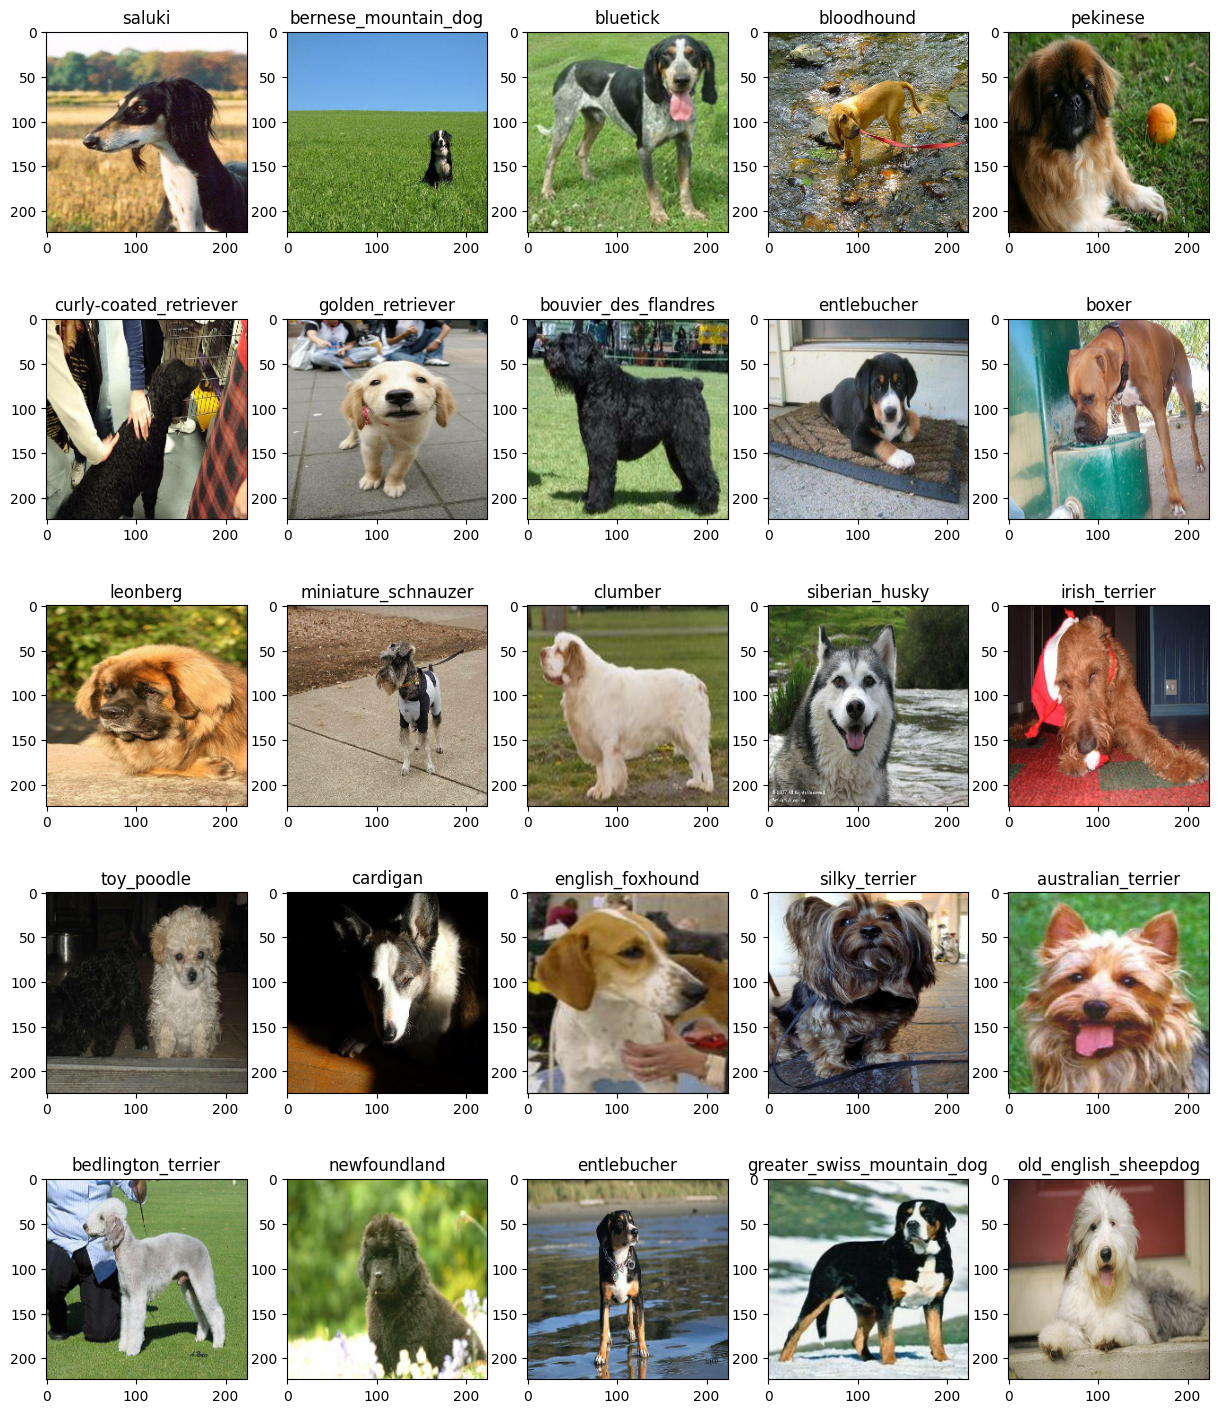

In [ ]:
# Now let's visualize the data in a training batch
show_25_images(train_images, train_labels)


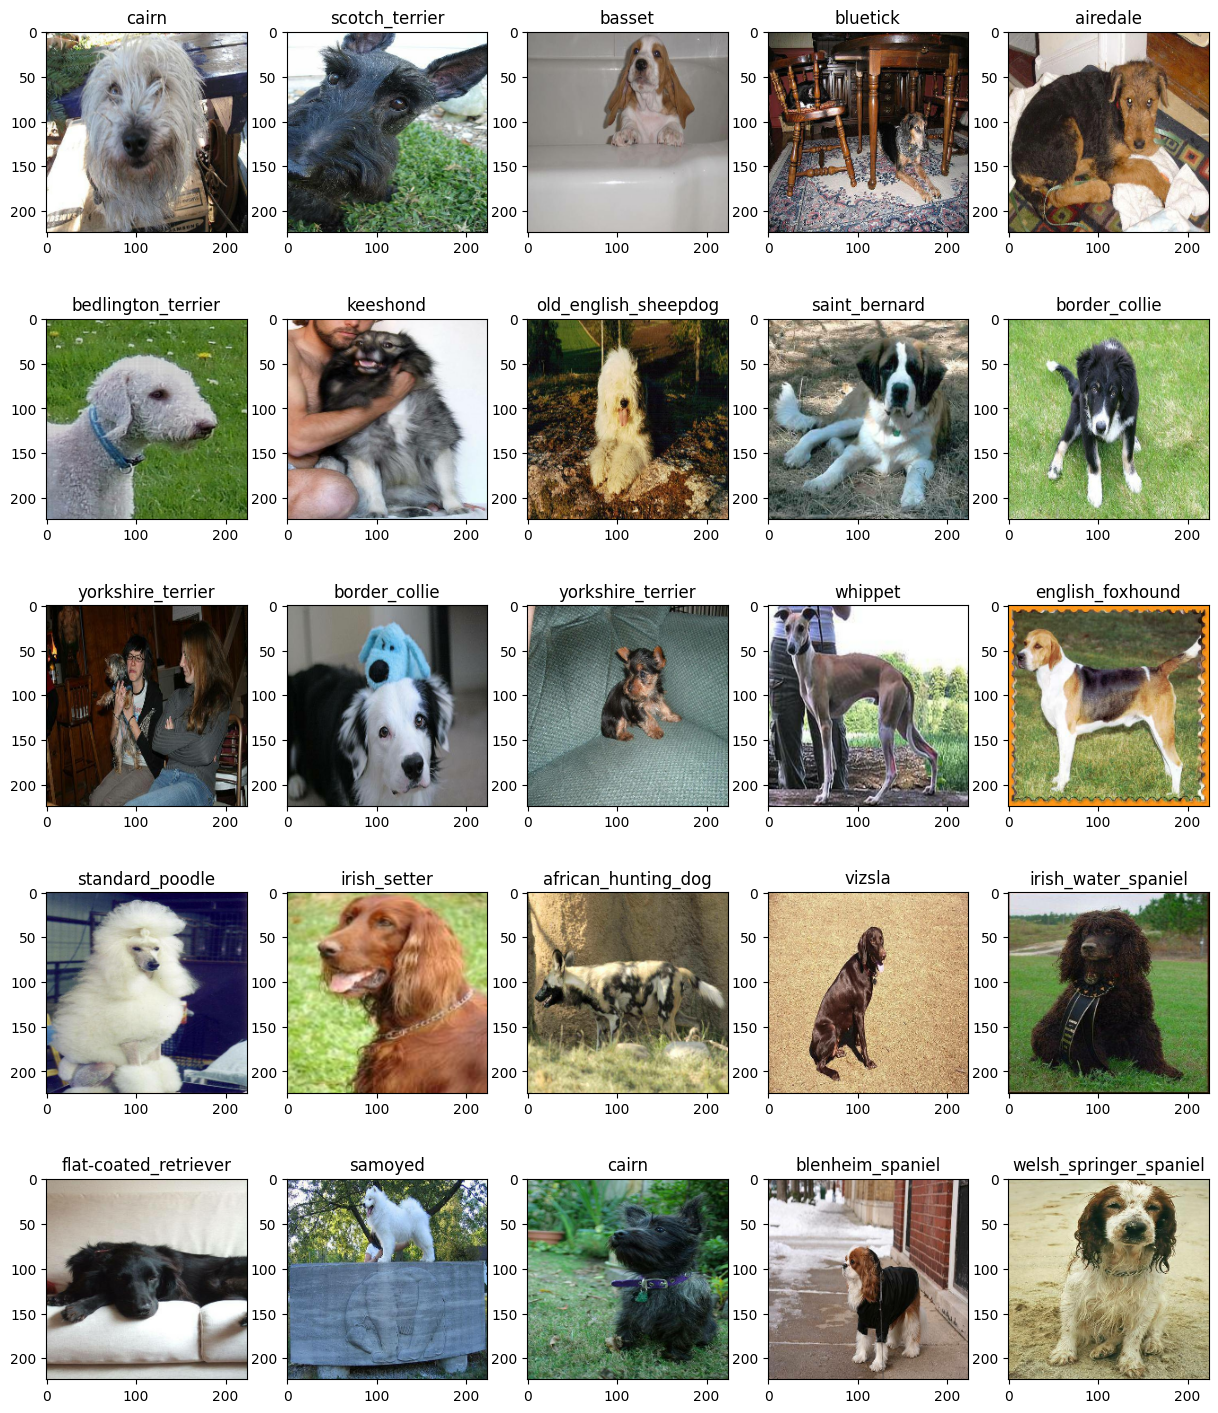

In [ ]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

##Building a model##

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
IMG_SIZE

224

In [ ]:
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]
OUTPUT_SHAPE=len(unique_breeds)

MODEL_URL= 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

# MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"



In [ ]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
    print("modle being used is.. ",MODEL_URL)

    # defining layers
    model=tf.keras.Sequential([hub.KerasLayer(MODEL_URL),
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation='softmax')])

    # compiling model
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

    # Building model
    model.build(INPUT_SHAPE)

    return model


In [ ]:
model=create_model()
model.summary()

modle being used is..  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


##Creating call backs##

These help to see the progress of teh model n stuff

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime
def create_tensorboard_callback():
    # create directory fot storing logs
    logsdir=os.path.join("/content/drive/MyDrive/dog-breed-identification/logs",datetime.datetime.now().strftime("%Y%M%D-%H%M%S"))

    return tf.keras.callbacks.TensorBoard(logsdir)



In [ ]:
# Early stopping callback
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

##Training Model##

create model

tensorflow call back

fit model

return model




In [ ]:
NUM_EPOCHS=100


In [ ]:
def train_model():
    # create model
    model=create_model()

    # tensorboard callback
    tensorboard=create_tensorboard_callback()

    # fil model
    model.fit(x=train_data,epochs=NUM_EPOCHS,validation_data=val_data,validation_freq=1,callbacks=[tensorboard,early_stopping])

    return model

In [ ]:
model=train_model()

modle being used is..  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 15s 222ms/step - loss: 4.5128 - accuracy: 0.1063 - val_loss: 3.5298 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 3s 105ms/step - loss: 1.6164 - accuracy: 0.6850 - val_loss: 2.2462 - val_accuracy: 0.4800
Epoch 3/100
25/25 [==============================] - 3s 101ms/step - loss: 0.5680 - accuracy: 0.9388 - val_loss: 1.6984 - val_accuracy: 0.5950
Epoch 4/100
25/25 [==============================] - 2s 96ms/step - loss: 0.2513 - accuracy: 0.9887 - val_loss: 1.5042 - val_accuracy: 0.6500
Epoch 5/100
25/25 [==============================] - 3s 138ms/step - loss: 0.1440 - accuracy: 0.9975 - val_loss: 1.4250 - val_accuracy: 0.6600
Epoch 6/100
25/25 [==============================] - 2s 97ms/step - loss: 0.0993 - accuracy: 0.9987 - val_loss: 1.3748 - val_accuracy: 0.6450
Epoch 7/100
25/25 [=============================

In [ ]:
# !pip install --upgrade tensorboard



In [ ]:
# !kill 8832

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/dog-breed-identification/logs

<IPython.core.display.Javascript object>

##Making Predictions##

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
pred=model.predict(val_data,verbose=1)
# verbose shows the outout

7/7 [==============================] - 2s 152ms/step


In [ ]:
pred

array([[1.5742457e-03, 3.8326692e-04, 1.8057080e-04, ..., 7.1772281e-04,
        8.9715009e-05, 8.2506882e-03],
       [1.0661095e-03, 9.2025904e-05, 1.7254874e-03, ..., 9.6619806e-05,
        2.1756226e-03, 7.3396397e-05],
       [6.2229815e-06, 2.6085583e-04, 1.9433693e-04, ..., 2.0938845e-05,
        2.3106688e-04, 1.6169535e-03],
       ...,
       [2.6720056e-06, 1.3723766e-04, 7.4051532e-05, ..., 4.1174048e-05,
        5.6189383e-05, 9.7154254e-05],
       [3.2050395e-03, 9.9760495e-05, 1.0076254e-04, ..., 4.1741641e-05,
        3.4769395e-04, 3.0617486e-03],
       [8.3201600e-04, 3.6680730e-04, 1.6326312e-03, ..., 1.1887793e-02,
        3.8700050e-03, 2.1309908e-04]], dtype=float32)

In [ ]:
pred[0]

array([1.5742457e-03, 3.8326692e-04, 1.8057080e-04, 1.5649678e-04,
       4.1517837e-04, 1.6530427e-04, 6.6536274e-03, 4.3621089e-04,
       2.2885422e-04, 9.8212471e-04, 1.2637778e-03, 7.3450276e-05,
       5.8507698e-04, 1.2212912e-04, 2.1344156e-04, 1.4386559e-03,
       7.0529888e-05, 1.7413950e-01, 2.7739692e-05, 1.0599923e-04,
       1.2813481e-03, 1.9402583e-05, 1.4003720e-05, 6.5180514e-04,
       1.2084338e-04, 1.2879983e-04, 2.5223291e-01, 3.0644427e-05,
       3.0317926e-04, 3.1613067e-04, 3.5090143e-05, 3.7185982e-04,
       1.9470492e-04, 4.4762401e-05, 4.0550451e-04, 1.2637611e-01,
       5.3742137e-05, 2.9744202e-04, 7.2046656e-05, 7.9545693e-04,
       7.8069768e-04, 1.5060120e-05, 9.6919430e-05, 3.5095867e-04,
       2.2387903e-04, 1.4057940e-04, 2.0284334e-04, 8.0141559e-05,
       8.4882806e-05, 2.8005679e-04, 3.9756406e-04, 3.9746265e-05,
       1.1417025e-04, 7.0770693e-05, 1.6822423e-04, 1.2478261e-04,
       5.8709360e-05, 3.2097907e-03, 4.3479001e-04, 4.8492230e

In [ ]:
pred.shape

(200, 120)

In [ ]:
len(unique_breeds)

120

In [ ]:
len(y_val)

200

In [ ]:
def get_pred_label(prob_pred):
    return unique_breeds[np.argmax(prob_pred)]

In [ ]:
pred_lab=get_pred_label(pred[0])
pred_lab

'cairn'

In [ ]:
images_=[]
labels_=[]

for image,label in val_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(label)

images_[0],labels_[0]


(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(labels_[2])

'basset'

In [ ]:
get_pred_label(pred[2])

'basset'

In [ ]:
def unbatchify(data):
    images_=[]
    labels_=[]

    for image,label in val_data.unbatch().as_numpy_iterator():
        images_.append(image)
        labels_.append(unique_breeds[np.argmax(label)])
    return images_,labels_

In [ ]:
val_images,val_labels=unbatchify(val_data)

In [ ]:
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
def visualize_pred_prob(pred_probs,labels,images,n=1):
    pred_prob,true_label,image=pred_probs[n],labels[n],images[n]

    pred_label=get_pred_label(pred_prob)

    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    if pred_label==true_label:
        color='green'
    else:
        color='red'


    plt.title("{}{:2.0f}{}".format(pred_label,np.max(pred_prob)*100,true_label),color=color)


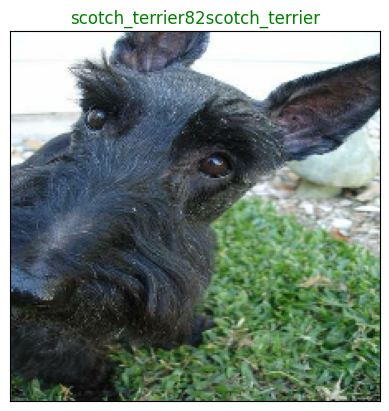

In [ ]:
visualize_pred_prob(pred,val_labels,val_images)

2nd kind of function

In [ ]:
def get_pred_plot(pred_prob,labels,n=1):

    pred_prob,true_label=pred_prob[n],labels[n]

    pred_label=get_pred_label(pred_prob)

    # finding top 10 indices
    top_index=pred_prob.argsort()[-10:][::-1]

    # finding 10 values
    top_values=pred_prob[top_index]

    # top 10 labels
    top_labels=unique_breeds[top_index]

    # plt
    top_plot=plt.bar(np.arange(len(top_labels)),top_values,color='grey')

    plt.xticks(np.arange(len(top_labels)),labels=top_labels,rotation="vertical")

    if np.isin(true_label,top_labels):
        top_plot[np.argmax(top_labels==true_label)].set_color("green")
    else:
        pass

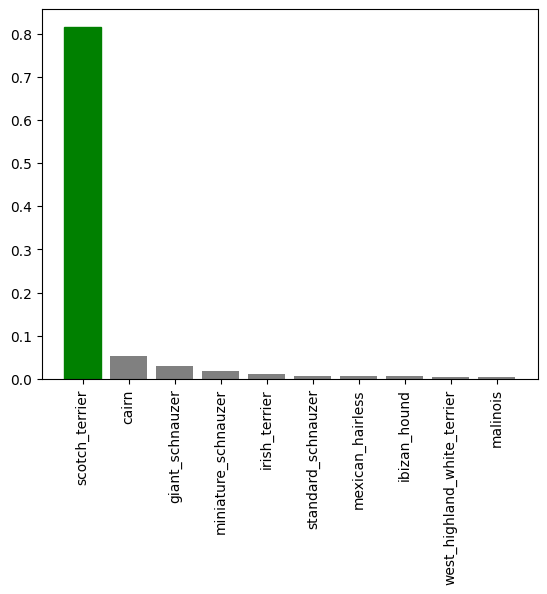

In [ ]:
get_pred_plot(pred,val_labels)

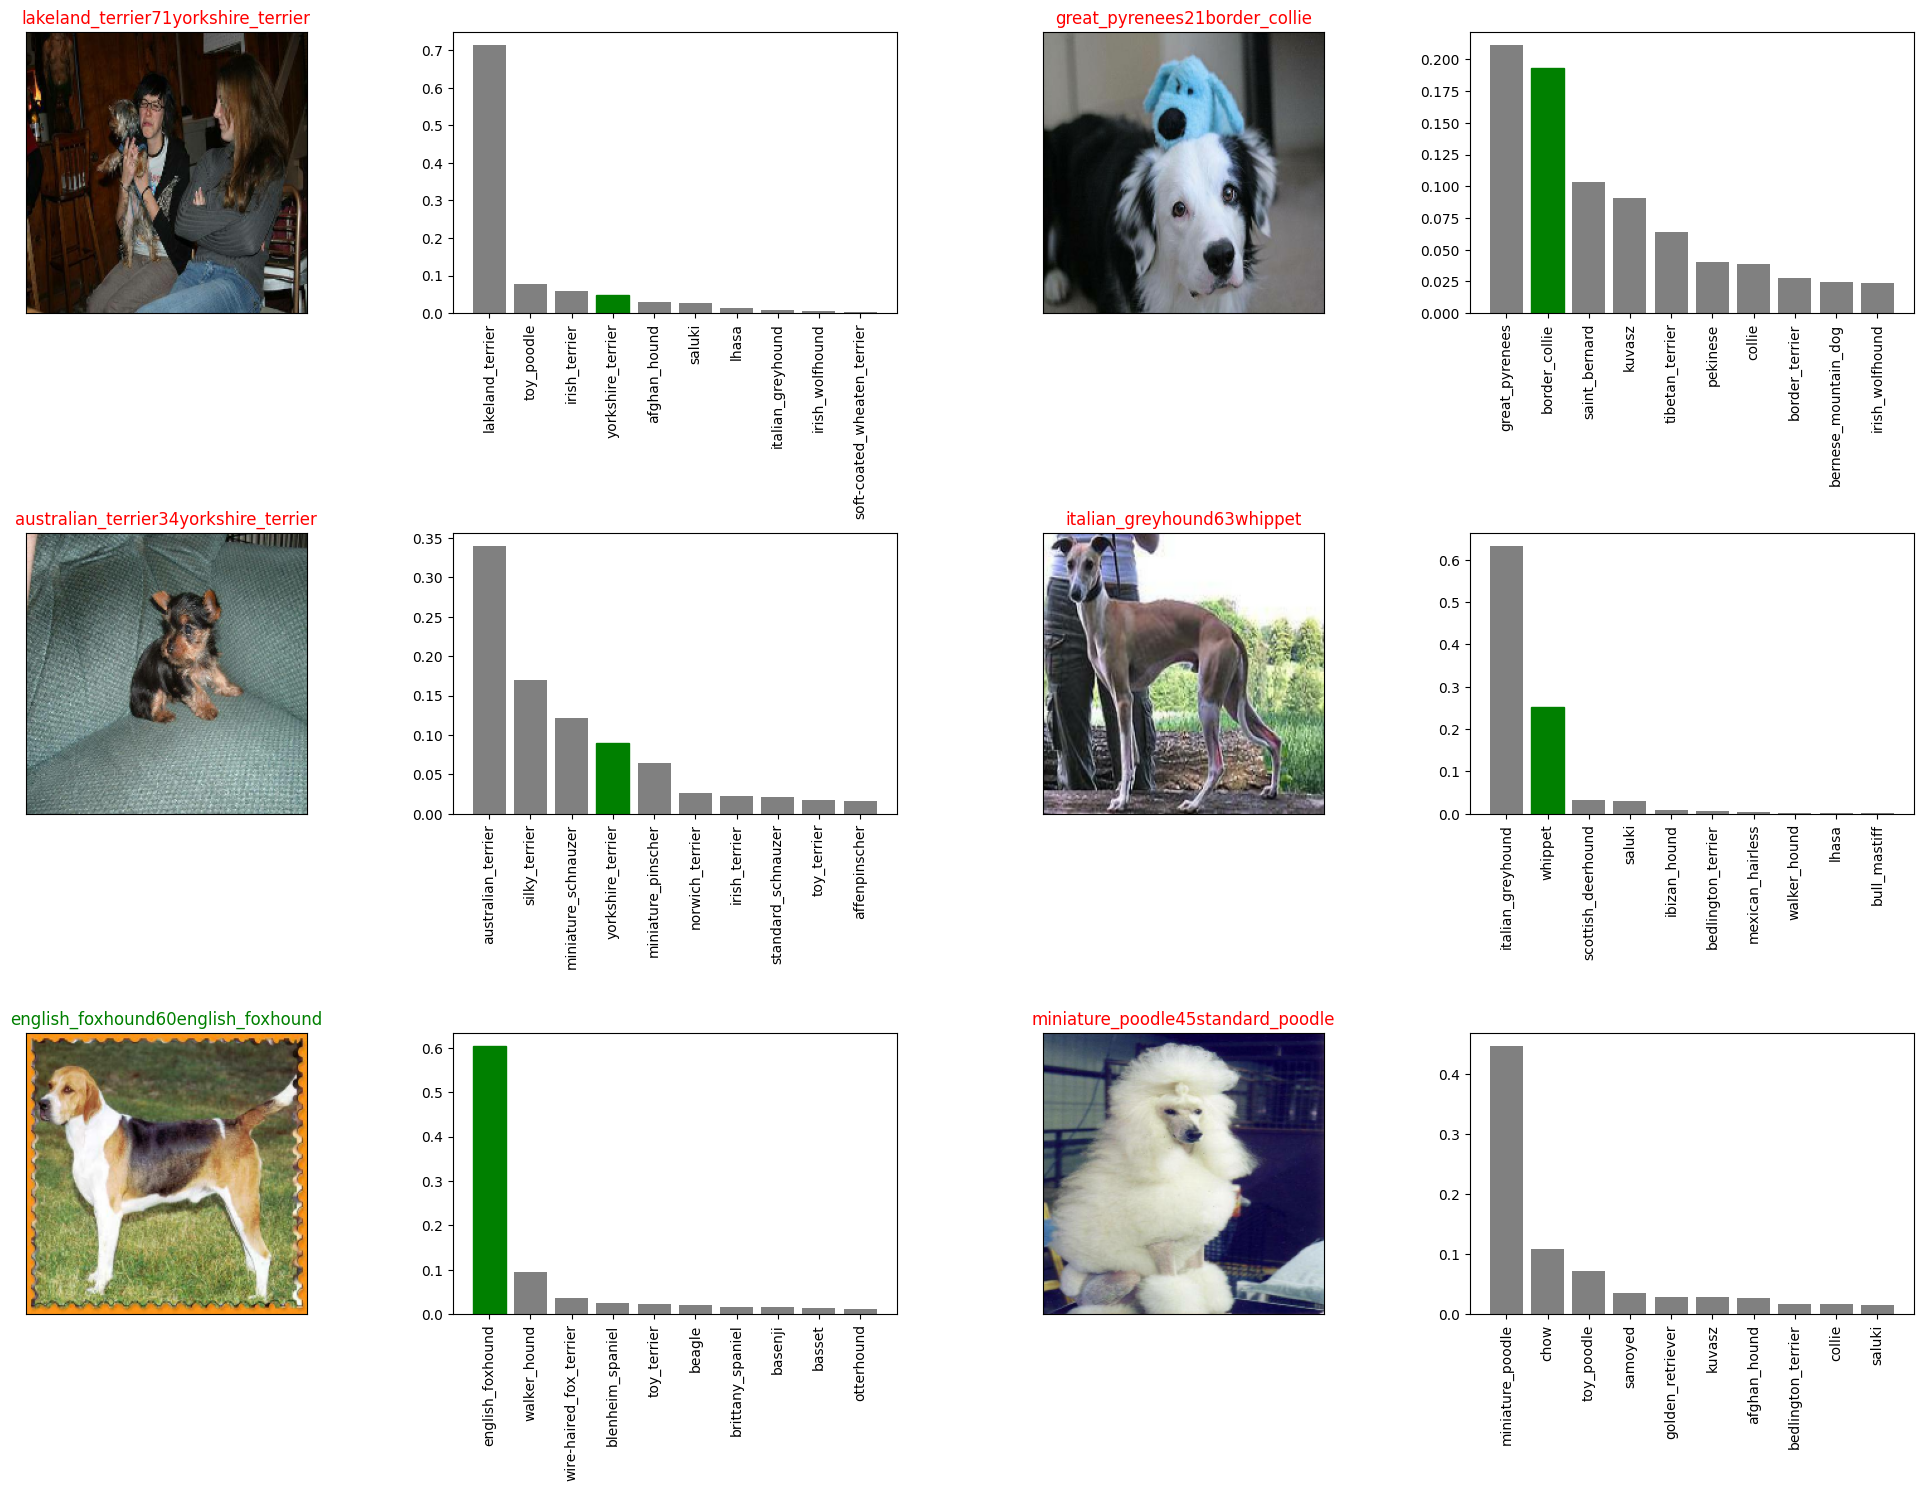

In [ ]:
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range (num_images):
  plt.subplot(num_rows, 2* num_cols, 2*i+1)
  visualize_pred_prob( pred,
            val_labels,
            val_images,
            n = i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  get_pred_plot(pred,
                val_labels,
                 n = i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()


##Saving mmodel##

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a model directory and appends a suffix (string)
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/dog-breed-identification/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "_" + suffix  + ".h5" # Save frmat of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a saved model
def load_model(model_path):
  """
  Loads a saved model from a specified oath.
  """
  print(f"Loading saved model from: {model_path}...")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000--images-mobilenetv2-Adam")

Saving model to: /content/drive/MyDrive/dog-breed-identification/models/20231231-17381704044292_1000--images-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/MyDrive/dog-breed-identification/models/20231231-17381704044292_1000--images-mobilenetv2-Adam.h5'

In [ ]:
# Load a trained model
loaded_1000_image_trained_model = load_model("/content/drive/MyDrive/dog-breed-identification/models/20231231-16511704041464_1000--images-mobilenetv2-Adam.h5")


Loading saved model from: /content/drive/MyDrive/dog-breed-identification/models/20231231-16511704041464_1000--images-mobilenetv2-Adam.h5...


##Evaluating on test set##

In [ ]:
# Evaluate the presaved model
model.evaluate(val_data)

7/7 [==============================] - 1s 70ms/step - loss: 1.3231 - accuracy: 0.6600


[1.3230528831481934, 0.6600000262260437]

In [ ]:
# Evaluate the loaded model
loaded_1000_image_trained_model.evaluate(val_data)

7/7 [==============================] - 1s 66ms/step - loss: 1.3651 - accuracy: 0.6150


[1.365147590637207, 0.6150000095367432]

In [ ]:
full_data = create_data_batches(X, y)

Create training data batches


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Createa a model for full model
full_model = create_model()


modle being used is..  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
    # Createa full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validations set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor =  "accuracy",patience=3)


**MIGHT TAKE TIME!!!**

In [ ]:
# Fit the full model to full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])


Epoch 1/100
320/320 [==============================] - 34s 86ms/step - loss: 1.3425 - accuracy: 0.6709
Epoch 2/100
320/320 [==============================] - 29s 89ms/step - loss: 0.4010 - accuracy: 0.8842
Epoch 3/100
320/320 [==============================] - 29s 89ms/step - loss: 0.2404 - accuracy: 0.9341
Epoch 4/100
320/320 [==============================] - 28s 86ms/step - loss: 0.1553 - accuracy: 0.9625
Epoch 5/100
320/320 [==============================] - 26s 81ms/step - loss: 0.1071 - accuracy: 0.9780
Epoch 6/100
320/320 [==============================] - 29s 90ms/step - loss: 0.0793 - accuracy: 0.9854
Epoch 7/100
320/320 [==============================] - 29s 89ms/step - loss: 0.0578 - accuracy: 0.9922
Epoch 8/100
320/320 [==============================] - 27s 84ms/step - loss: 0.0464 - accuracy: 0.9952
Epoch 9/100
320/320 [==============================] - 26s 82ms/step - loss: 0.0373 - accuracy: 0.9969
Epoch 10/100
320/320 [==============================] - 28s 86ms/step - l

In [ ]:
save_model(full_model, suffix = "full-image-set-mobilenetv2-Adam")


Saving model to: /content/drive/MyDrive/dog-breed-identification/models/20231231-17471704044826_full-image-set-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/dog-breed-identification/models/20231231-17471704044826_full-image-set-mobilenetv2-Adam.h5'

In [ ]:
load_full_model = load_model("/content/drive/MyDrive/dog-breed-identification/models/20231231-17101704042632_full-image-set-mobilenetv2-Adam.h5")


Loading saved model from: /content/drive/MyDrive/dog-breed-identification/models/20231231-17101704042632_full-image-set-mobilenetv2-Adam.h5...


In [ ]:
load_full_model.evaluate(val_data)

7/7 [==============================] - 1s 69ms/step - loss: 0.0068 - accuracy: 1.0000


[0.006752752233296633, 1.0]

In [ ]:
# Load the image filenames
import os
test_path = "/content/drive/MyDrive/dog-breed-identification/test"
test_filenames = [test_path +fname for fname in os.listdir(test_path)]
test_filenames[:10]


['/content/drive/MyDrive/dog-breed-identification/teste783e22d4f370b6cc0b1f44b4d6584a8.jpg',
 '/content/drive/MyDrive/dog-breed-identification/teste7b608110b0e29120d8740f37e85f3d0.jpg',
 '/content/drive/MyDrive/dog-breed-identification/teste7e9624f2a2e61ab187358f5968bfde8.jpg',
 '/content/drive/MyDrive/dog-breed-identification/teste7be7b911a4cba9fdfa4105ec4776370.jpg',
 '/content/drive/MyDrive/dog-breed-identification/teste79030be9c9769f3604474aea16039bd.jpg',
 '/content/drive/MyDrive/dog-breed-identification/teste7afcce6e45858fc3b294cc5c0b15a53.jpg',
 '/content/drive/MyDrive/dog-breed-identification/teste7afb35b8252782013a6700e28e327fa.jpg',
 '/content/drive/MyDrive/dog-breed-identification/teste774fbfeb4b712ca042f93edea3835af.jpg',
 '/content/drive/MyDrive/dog-breed-identification/teste85d4e2707683df0e6387e19b67b873d.jpg',
 '/content/drive/MyDrive/dog-breed-identification/teste85291fc6ba44e39defc7769fa020646.jpg']

In [ ]:
test_data = create_data_batches(test_filenames, test_data = True )


creating test data batches


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# test_predictions = load_full_model.predict(test_data, verbose=1)


In [ ]:
# Save predictions (NumPy array) to csv file (for later a
# np.savetxt("drive/MyDrive/ Dog Vision/preds_array.csv", test_predictions, delimiter=",")


In [ ]:
test_predictions = np.loadtxt("/content/drive/MyDrive/dog-breed-identification/dog-vision-prediction-probabilites-array.csv", delimiter=",")


In [ ]:
test_predictions[:5]

array([[1.61196489e-09, 3.44086413e-12, 2.32834394e-11, 1.40799395e-12,
        5.98032956e-09, 2.14533929e-11, 5.32851652e-10, 1.76493417e-10,
        4.49105718e-11, 1.84297355e-09, 5.29732508e-14, 6.22356655e-09,
        5.95073361e-13, 2.66395013e-08, 3.28688065e-15, 1.21886199e-11,
        1.19793180e-08, 2.38417955e-13, 4.40795955e-10, 3.99062901e-11,
        2.83421154e-13, 3.95438716e-12, 1.97962841e-10, 8.23695487e-11,
        1.06676962e-05, 1.19700536e-14, 9.42683501e-11, 6.76076625e-11,
        1.22097462e-11, 1.13671131e-05, 2.65428781e-12, 2.08955270e-10,
        3.13114146e-10, 2.81222046e-09, 4.10381153e-15, 1.54404389e-13,
        8.28562479e-12, 3.35177133e-12, 7.26731988e-13, 2.19305407e-11,
        2.61968953e-08, 2.37896139e-12, 9.63114245e-13, 4.27652705e-12,
        3.16920490e-10, 4.95381652e-11, 7.48146662e-13, 1.53999684e-13,
        1.32033314e-13, 5.06832687e-10, 1.54794150e-10, 9.16578554e-13,
        6.30603514e-10, 7.39330645e-12, 9.43311193e-11, 2.102985

In [ ]:
import os
custom_path = "/content/drive/MyDrive/dog-breed-identification/my-dog-pics/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]


In [ ]:
custom_image_paths


['/content/drive/MyDrive/dog-breed-identification/my-dog-pics/dog1.jpg',
 '/content/drive/MyDrive/dog-breed-identification/my-dog-pics/dog2.jpg']

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

creating test data batches


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on the custom data
custom_prefs = load_full_model.predict(custom_data)

1/1 [==============================] - 1s 1s/step


In [ ]:

custom_prefs.shape

(2, 120)

In [ ]:
# get custom image predictions labels
custom_pred_labels = [get_pred_label(custom_prefs[i]) for i in range(len(custom_prefs))]
custom_pred_labels

['german_shepherd', 'rottweiler']

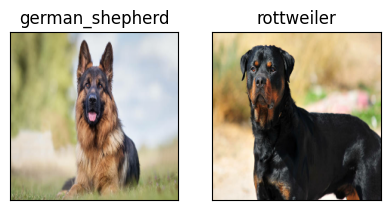

In [ ]:
# Get the custom images (pur unbatchify () functio wont work since there aren't ;labels.. maybe we could fix that later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)





# Check custom image predictions
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)
